# Usar los vectores para Clasificacion y Clustering

In [ ]:
!pip install -U sentence-transformers --quiet

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [4]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')
df = pd.read_csv("https://raw.githubusercontent.com/openai/openai-cookbook/f854f6f0ca2ca4482e1b138ac12aa4be6f0bf79a/examples/data/fine_food_reviews_1k.csv")

In [5]:
df.head()

,Unnamed: 0,Time,ProductId,UserId,Score,Summary,Text
0,0,1351123200,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...
1,1,1351123200,B003JK537S,A3JBPC3WFUT5ZP,1,Arrived in pieces,"Not pleased at all. When I opened the box, mos..."
2,2,1351123200,B000JMBE7M,AQX1N6A51QOKG,4,"It isn't blanc mange, but isn't bad . . .",I'm not sure that custard is really custard wi...
3,3,1351123200,B004AHGBX4,A2UY46X0OSNVUQ,3,These also have SALT and it's not sea salt.,I like the fact that you can see what you're g...
4,4,1351123200,B001BORBHO,A1AFOYZ9HSM2CZ,5,Happy with the product,My dog was suffering with itchy skin. He had ...


In [6]:
#Las frases son vectorizadas llamando a model.encode()
output = model.encode(df["Text"])

In [7]:
embeddings = pd.DataFrame(output)

In [8]:
X = embeddings

## Clasificacion

In [9]:
y = df["Score"]
y

0      5
1      1
2      4
3      3
4      5
      ..
995    5
996    5
997    5
998    5
999    5
Name: Score, Length: 1000, dtype: int64

In [10]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
# prompt: entrenar un algoritmo de gradient boosting de sklearn usando X_train e y_train

from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the Gradient Boosting Classifier
clf = GradientBoostingClassifier()

# Train the model using the training data
clf.fit(X_train, y_train)


GradientBoostingClassifier()

In [12]:
# prompt: contar cuantos de clada clase hay en y

import numpy as np
unique_classes, class_counts = np.unique(y, return_counts=True)
class_counts_dict = dict(zip(unique_classes, class_counts))
print(class_counts_dict)


{1: 87, 2: 49, 3: 75, 4: 138, 5: 651}


In [13]:
# prompt: Evaluar el resultado del clasificador clf utilizando X_test e y_test

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7363636363636363


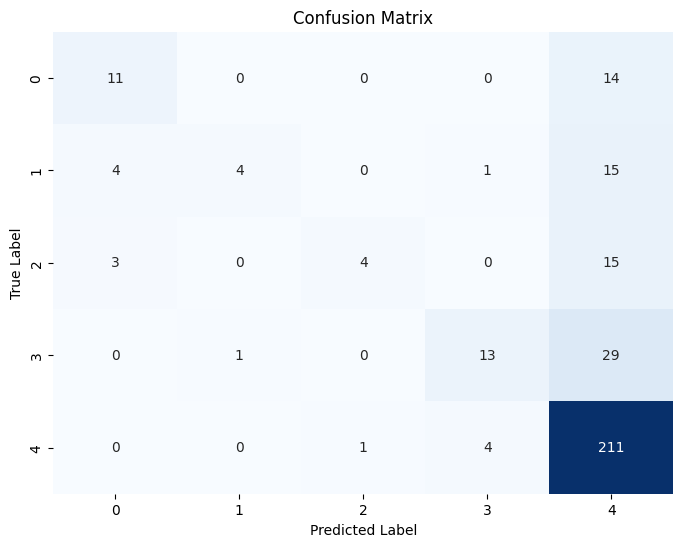

In [14]:
# prompt: plot the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

# Create the confusion matrix visualization.
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Podemos observar que clasifica mejor los casos en que el score es 1 o 5

## Clustering

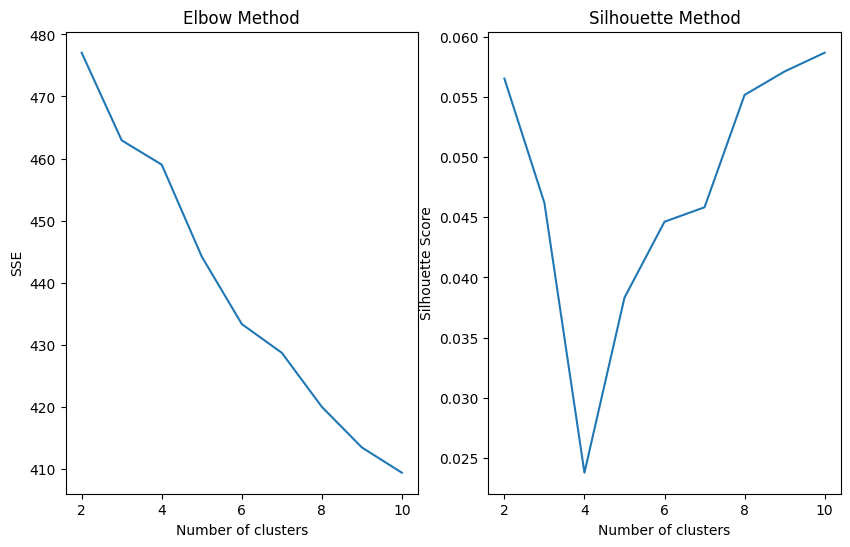

In [20]:
# prompt: use kmeans on X_train with k from 2 to 10 and then calculate and plot the elbow and silohuete

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

sse = []
silhouettes = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_train, kmeans.labels_))

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouettes)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.show()


No se observa un patron claro de cuantos clusters podriamos generar. Quizas 2 clusters se corresponde con lo visto anteriormente que es mas facil separar en positivo y negativo que en 5 categorias de score

# Fin: [Volver al contenido del curso](https://www.freecodingtour.com/cursos/espanol/deeplearning/deeplearning.html)